# flights
## By Mohamed NOUR

## Preliminary Wrangling

> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
flight=pd.read_csv('2008.csv')

In [4]:
df=flight.copy()

In [5]:
#Replace the airline code by airline name to make it clear to normal people
df.UniqueCarrier = df.UniqueCarrier.map({'WN':'Southwest', 'XE':'Delux', 'YV':'Mesa', 'OH':'PSA', 'OO':'SkyWest', 'UA':'United', 'US':'Puerto Rico', 'DL':'Delta ', 'EV':'ExpressJet', 'F9':'Frontier', 'FL':'Air Large',
       'HA':'Hawaiian', 'MQ':'Envoy ', 'NW':' Northwest', '9E':'Endeavor ', 'AA':'American ', 'AQ':'9 Air', 'AS':'Alaska ', 'B6':'Jetblue ', 'CO':'North-Western '})

In [6]:
#used to repalce day_of_week from numbers to day names
XD=[0,1,2,3,4,5,6]
values = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [7]:
df.head()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,Southwest,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,Southwest,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,Southwest,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,Southwest,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,Southwest,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [9]:
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

In [10]:
#df['DATE'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=df.DayofMonth))

In [11]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,7.008884e+06,6.855029e+06,6.855029e+06,6.873482e+06,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,1.288668e+02,1.040186e+02,8.168452e+00,9.972570e+00,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,6.940974e+01,6.743980e+01,3.850194e+01,3.531127e+01,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,-1.410000e+02,0.000000e+00,-5.190000e+02,-5.340000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,8.000000e+01,5.500000e+01,-1.000000e+01,-4.000000e+00,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,1.100000e+02,8.600000e+01,-2.000000e+00,-1.000000e+00,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,1.590000e+02,1.320000e+02,1.200000e+01,8.000000e+00,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,1.435000e+03,1.350000e+03,2.461000e+03,2.467000e+03,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


### What is the structure of your dataset?

>7009728 rows contains 29 features from the flights dataset It focuses heavily on the details of flights, from take-off and landing dates, delay times and the name of the airline
### What is/are the main feature(s) of interest in your dataset?

> The realation between the time of flight , carrier name, delay and cancel ratio I will focus on the departure delay only.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> DayOfWeek, DepDelay  , CRSDepTime, UniqueCarrier,Cancelled.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [12]:
#fixed color to our plots
base_color=sb.color_palette()[0]

In [13]:
def count_plot (data,var):
    '''
    a function takes dataset and value of interest and gives a seaborn countplot in descending order
    
    '''
    #arrang the varkiable in descending order
    w=data[var].value_counts().index
    #figure size
    plt.figure(figsize = [12, 8])
    sb.countplot(data=data,x=var,color=base_color,order=w)
    #rotate x-axis values by 90°
    plt.xticks(rotation=90)
    

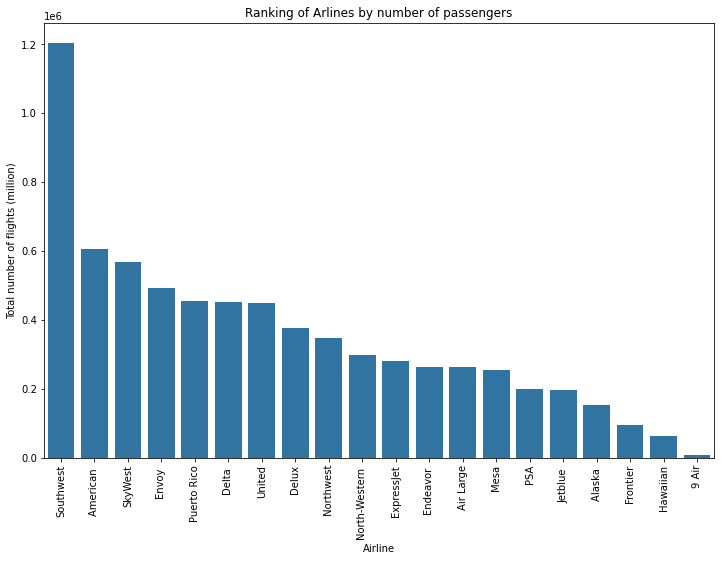

In [14]:
#use count_plot function to do seaborn countplot
count_plot(df,'UniqueCarrier')
plt.xlabel('Airline')
plt.ylabel('Total number of flights (million)')
plt.title('Ranking of Arlines by number of passengers');

Southwest Airline is the most successful airline

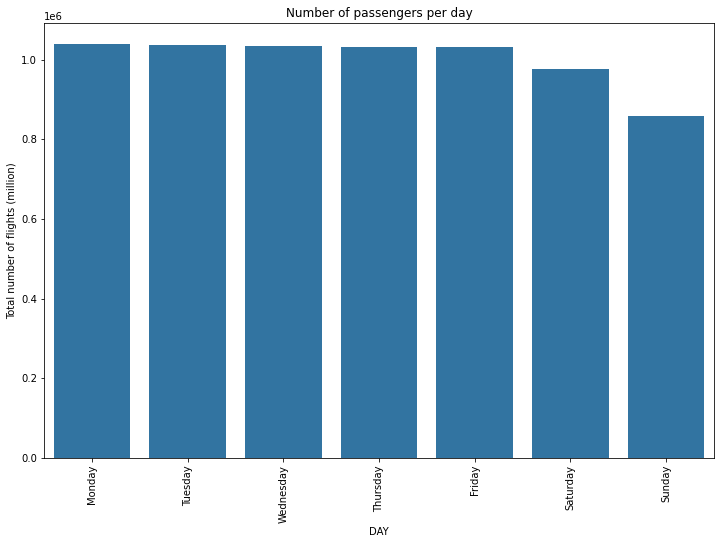

In [15]:
count_plot(df,'DayOfWeek')
plt.xticks(XD,values)
plt.xlabel('DAY')
plt.ylabel('Total number of flights (million)')
plt.title('Number of passengers per day');

I wanted to know if there was a significant difference in the number of trips depending on the day of the week and I found that the number of trips on the weekend is slightly less than on the working days

In [16]:
def histogram (Data,var,Bins):
    """
    a function takes dataset , value of interest ,
    bins and gives a histogram of this value using the given bins
    
    """
    #chose the figure size
    plt.figure(figsize = [12, 6])
    
    plt.hist(data=Data, x=var,bins=Bins);
    

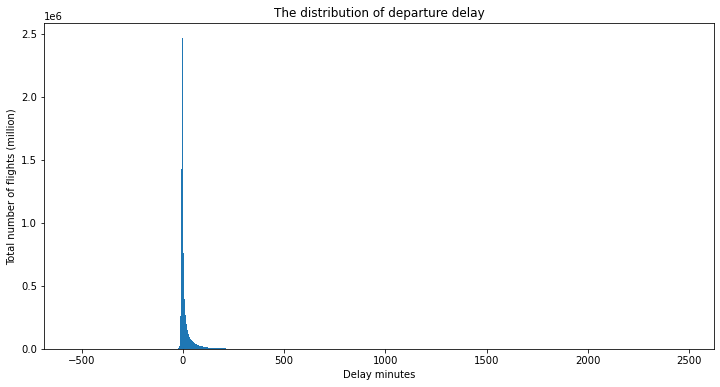

In [17]:
bins = np.arange(df.DepDelay.min(),df.DepDelay.max()+5,5)
histogram(df,'DepDelay',bins)
plt.xlabel('Delay minutes')
plt.ylabel('Total number of flights (million)')
plt.title('The distribution of departure delay');

So much outliers in the next slide I will use 95% of data quantile

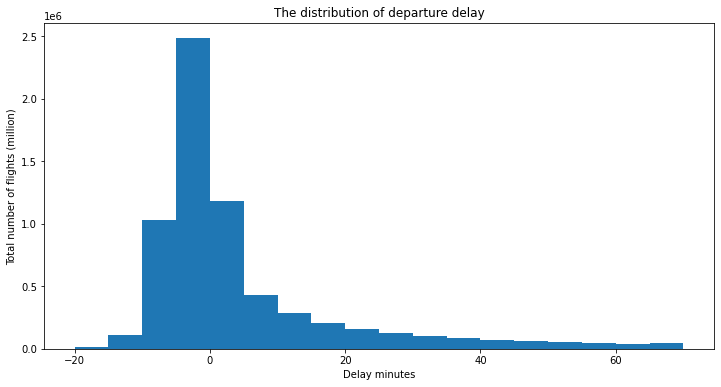

In [18]:
#chose the bins range
bins = np.arange(-20,df.DepDelay.quantile(0.95)+5,5)
# use the histogram function to plot 
histogram(df,'DepDelay',bins)
plt.xlabel('Delay minutes')
plt.ylabel('Total number of flights (million)')
plt.title('The distribution of departure delay');

I discovered that most of delays is less than 30 minutes

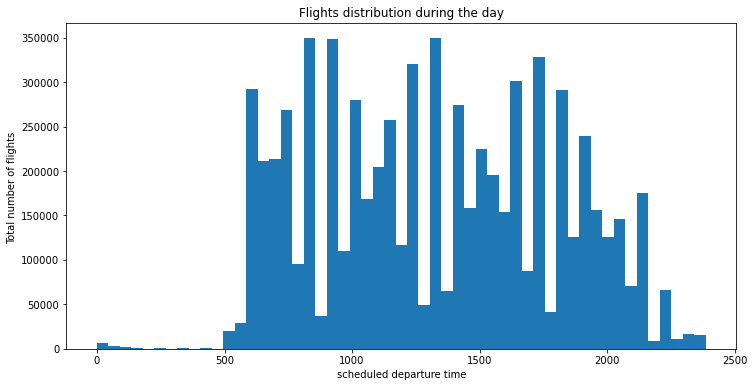

In [19]:

bins = np.arange(df.CRSDepTime.min(),df.CRSDepTime.max()+45,45)
histogram(df,'CRSDepTime',bins)
plt.title('Flights distribution during the day')
plt.ylabel('Total number of flights ')
plt.xlabel('scheduled departure time');


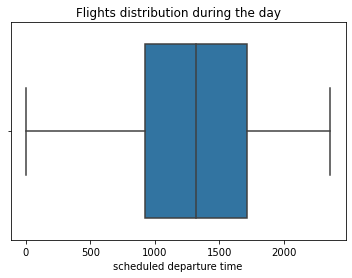

In [20]:
sb.boxplot(data=df, x='CRSDepTime');
plt.title('Flights distribution during the day')
plt.xlabel('scheduled departure time');

From the two plots we can find that most of flights is scheduled between 10 am and 8 pm

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the distribution of delay minutes the range is very big because of the existence of outliers

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> To focus on the area where most of delay happens I limted the x-axis just to a delay of 110 minutes

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [21]:
carrier_delay=df.groupby(['UniqueCarrier'])['DepDelay'].mean()
carrier_delay=carrier_delay.reset_index()
order=carrier_delay['DepDelay'].sort_values(ascending=False).index
order

Int64Index([19, 4, 14, 12, 13, 9, 15, 6, 8, 18, 2, 5, 17, 3, 7, 0, 10, 16, 11,
            1],
           dtype='int64')

In [22]:
#used to have a list of arranged airline names
get_order=[]
for i in order:
    carrier=carrier_delay.iloc[i,0]
    get_order.append(carrier)

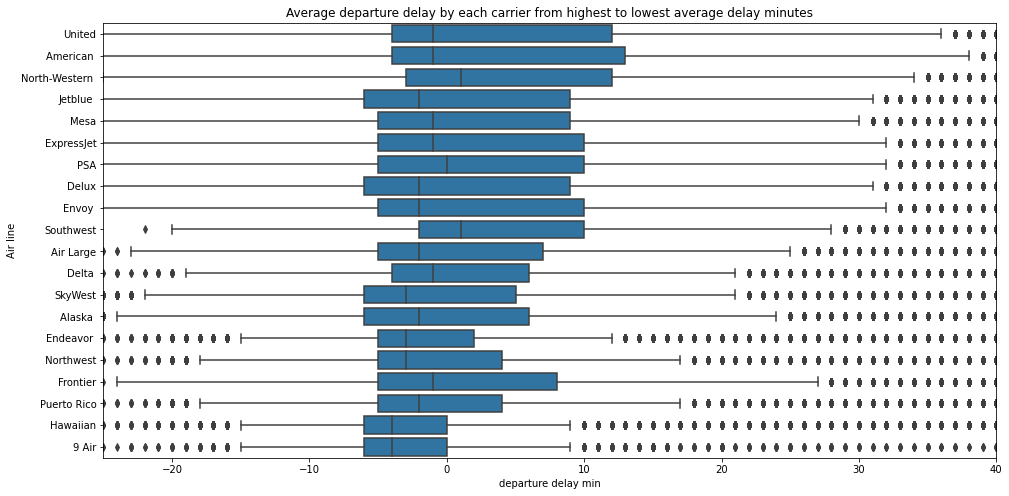

In [23]:
plt.figure(figsize = [16, 8])
sb.boxplot(data=df,y='UniqueCarrier',x='DepDelay',order=get_order,color=base_color)
plt.title('Average departure delay by each carrier from highest to lowest average delay minutes')
plt.ylabel('Air line')
plt.xlabel('departure delay min');
plt.xlim(-25,40);

Most of airlines have a delay in ten minutes range

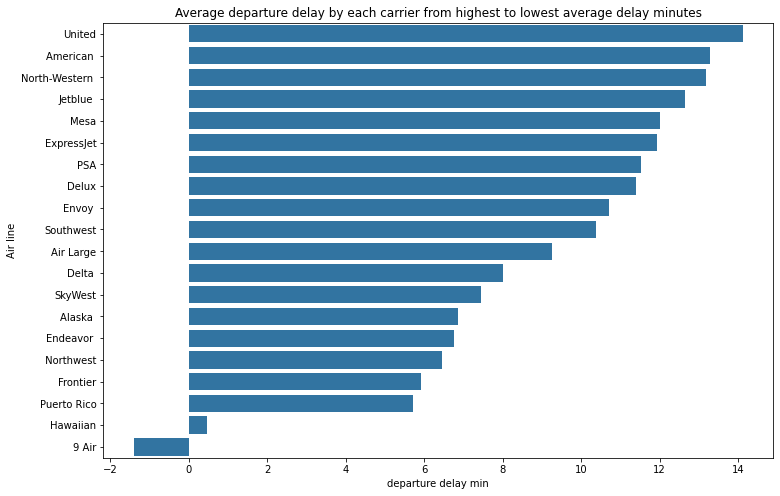

In [24]:
plt.figure(figsize = [12, 8])
sb.barplot(data=carrier_delay,y='UniqueCarrier',x='DepDelay',order=get_order,color=base_color)
plt.title('Average departure delay by each carrier from highest to lowest average delay minutes')
plt.ylabel('Air line')
plt.xlabel('departure delay min');

I wanted to know the average delay minutes to each carrier to know if this has a relation with the total number of flights each carrier makes.

In [26]:
carrier_order=df.UniqueCarrier.value_counts().index

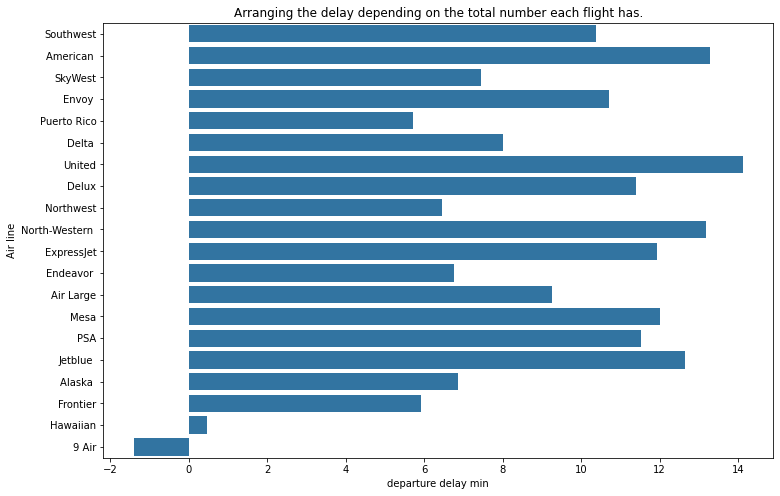

In [27]:
plt.figure(figsize = [12, 8])
sb.barplot(data=carrier_delay,y='UniqueCarrier',x='DepDelay',order=carrier_order,color=sb.color_palette()[0])
plt.title('Arranging the delay depending on the total number each flight has.')
plt.ylabel('Air line')
plt.xlabel('departure delay min');

And although it is the most busiest company, it is not the first in the average delay and this is a  bad indication to the performance of UA air carrier

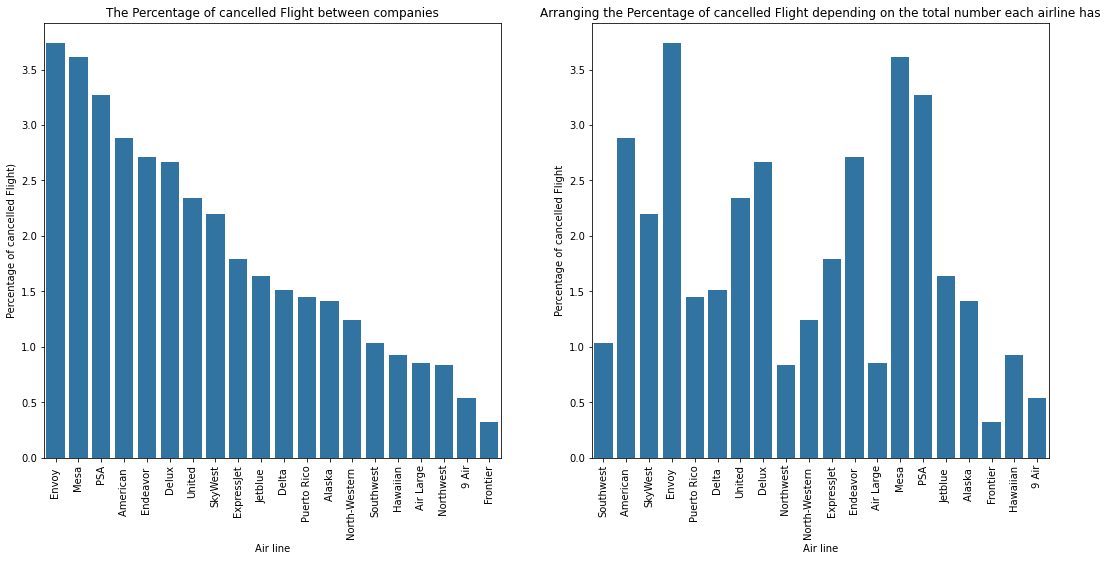

In [28]:
cancelled=df.groupby('UniqueCarrier')['Cancelled'].mean()
#to make cancelled a datafram
cancelled=cancelled.reset_index()
#multiplie by 100 to get percentage
cancelled['Cancelled']=cancelled['Cancelled']*100
#get_order to have a list of arranged airlines based on cancelled flight percentage
c_order=cancelled['Cancelled'].sort_values(ascending=False).index
get_order=[]
for i in c_order:
    carrier=cancelled.iloc[i,0]
    get_order.append(carrier)
plt.figure(figsize = [18, 8])

plt.subplot(1, 2, 1) #used to have to plots in same figure 
sb.barplot(data=cancelled,x='UniqueCarrier',y='Cancelled',order=get_order,color=sb.color_palette()[0]);
plt.xticks(rotation=90);
plt.title('The Percentage of cancelled Flight between companies');
plt.xlabel('Air line')
plt.ylabel('Percentage of cancelled Flight)');

plt.subplot(1,2, 2) # we have one row two columns and two plots
sb.barplot(data=cancelled,x='UniqueCarrier',y='Cancelled',order=carrier_order,color=sb.color_palette()[0]);
plt.xticks(rotation=90);
plt.title('Arranging the Percentage of cancelled Flight depending on the total number each airline has');
plt.xlabel('Air line')
plt.ylabel('Percentage of cancelled Flight');

The most successful companies have lower cancellation percentage and this gives an other indication about the air carriers performance and that being busy does not mean you have bad services

In [29]:
day_delay=df.groupby('DayOfWeek')['DepDelay'].mean()
day_delay=day_delay.reset_index()

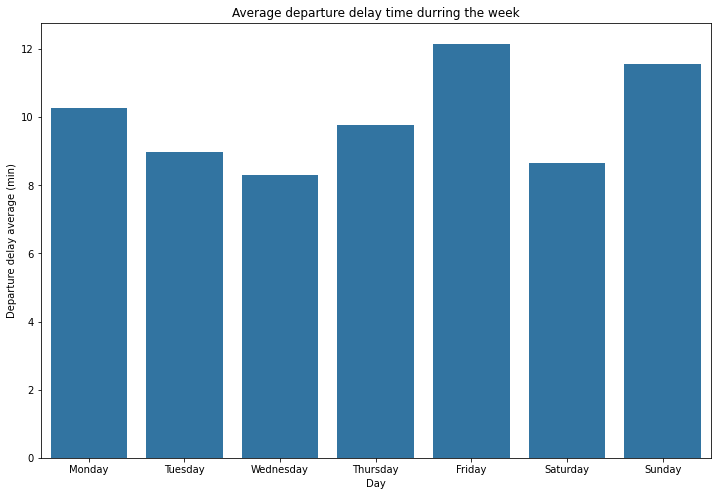

In [30]:
plt.figure(figsize = [12, 8])

sb.barplot(data=day_delay,x='DayOfWeek',y='DepDelay',color=base_color)
plt.ylabel('Departure delay average (min)')
plt.xlabel('Day')
plt.title('Average departure delay time durring the week')
plt.xticks(XD,values);

Looks like last work day has much delay then on Sunday 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I discovered that successful companies in attracting a large number of customers enjoying reasonable delay time and they cancel less flights than most of other companies

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> On the start of weekend and and on its end looks we have more departure delay

## Multivariate Exploration



In [31]:
month_delay=df.groupby(['Month','UniqueCarrier'])['DepDelay'].mean()
month_delay=month_delay.reset_index()
month_delay.head()

,Month,UniqueCarrier,DepDelay
0,1,Northwest,6.694734
1,1,9 Air,-0.834124
2,1,Air Large,5.748632
3,1,Alaska,9.807661
4,1,American,15.842610


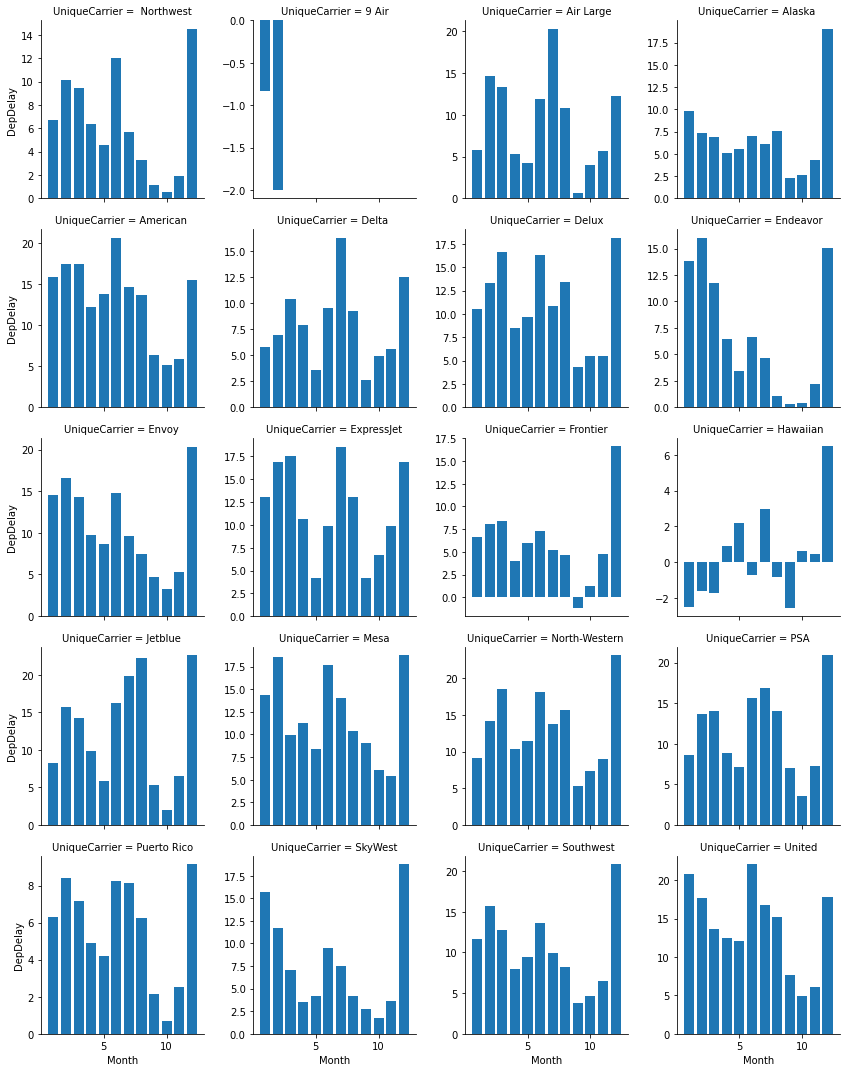

In [32]:
g = sb.FacetGrid(data = month_delay, col = 'UniqueCarrier', col_wrap=4, sharey=False)
g.map(plt.bar,'Month',"DepDelay");

Holiday months lead the delay 

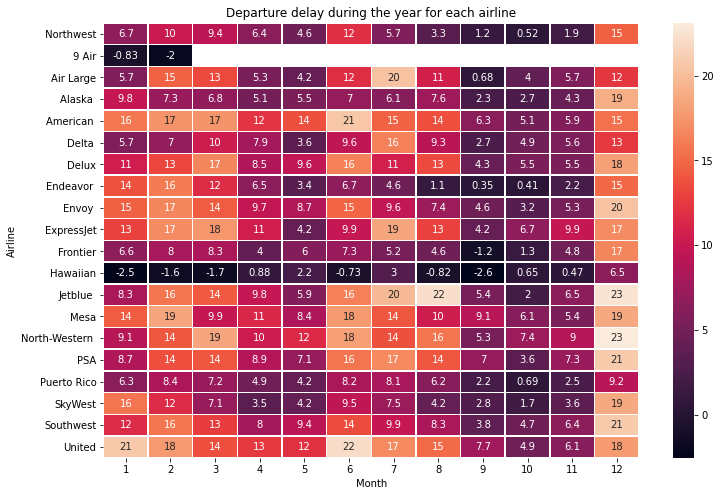

In [33]:

plt.figure(figsize = [12, 8])
flights = month_delay.pivot( "UniqueCarrier","Month", "DepDelay")
plt.title('Departure delay during the year for each airline');
ax = sb.heatmap(flights ,annot=True,linewidths=.5)
plt.ylabel('Airline');

In December and the  months of winter, it is more likely to have a delayed flight

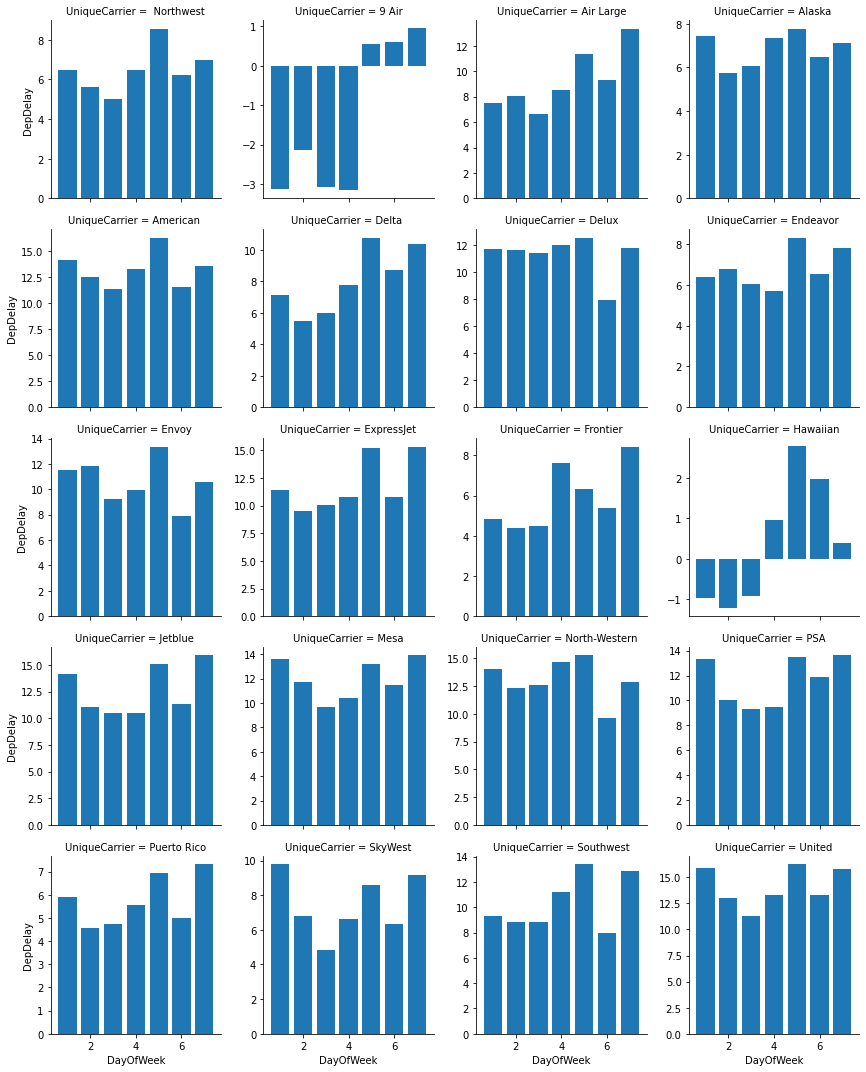

In [43]:
day_delay=df.groupby(['DayOfWeek','UniqueCarrier'])['DepDelay'].mean()
day_delay=day_delay.reset_index()
g = sb.FacetGrid(data =day_delay, col = 'UniqueCarrier', col_wrap=4, sharey=False)
g.map(plt.bar,'DayOfWeek',"DepDelay");

No clear evidance that there is a relation between days and average delay time

In [35]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,Southwest,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,Southwest,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,Southwest,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,Southwest,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,Southwest,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [36]:
df_max=df.query("UniqueCarrier=='Southwest' ")
df_max=df_max.groupby(['UniqueCarrier','DayOfWeek'])['DepDelay'].mean()
df_max=df_max.reset_index()
df_max.head()

,UniqueCarrier,DayOfWeek,DepDelay
0,Southwest,1,9.330596
1,Southwest,2,8.815240
2,Southwest,3,8.825508
3,Southwest,4,11.176690
4,Southwest,5,13.392461


In [37]:
df_max=df.query("UniqueCarrier=='Southwest' ")
df_max=df_max.groupby(['UniqueCarrier','DayOfWeek','CRSDepTime'])['DepDelay'].mean()
df_max=df_max.reset_index()
df_max.head()

,UniqueCarrier,DayOfWeek,CRSDepTime,DepDelay
0,Southwest,1,600,1.030483
1,Southwest,1,605,0.513587
2,Southwest,1,610,0.600653
3,Southwest,1,615,0.716458
4,Southwest,1,620,1.684651


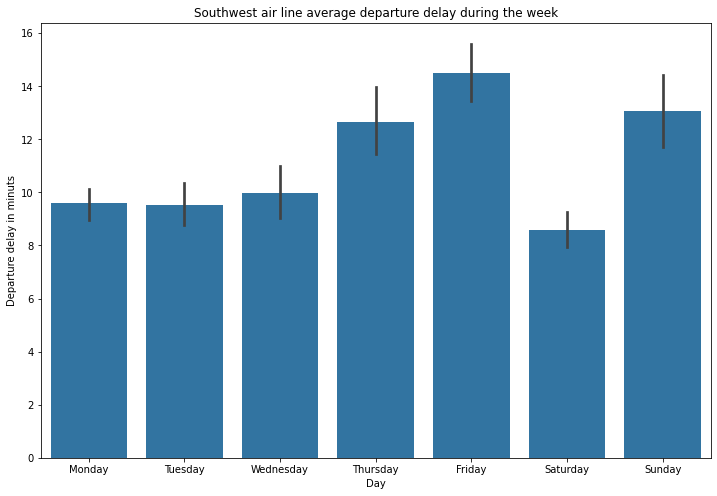

In [38]:
plt.figure(figsize = [12, 8])
sb.barplot(data = df_max, x = 'DayOfWeek', y = 'DepDelay',color=sb.color_palette()[0])
plt.title('Southwest air line average departure delay during the week')
plt.ylabel('Departure delay in minuts')
plt.xlabel('Day')
plt.xticks(XD,values);

Most of Saturday fligths are on time

In [39]:
df_max.head()

,UniqueCarrier,DayOfWeek,CRSDepTime,DepDelay
0,Southwest,1,600,1.030483
1,Southwest,1,605,0.513587
2,Southwest,1,610,0.600653
3,Southwest,1,615,0.716458
4,Southwest,1,620,1.684651


In [40]:
#df_max.groupby(['DayOfWeek','CRSDepTime_hour']).DepDelay.mean()

In [41]:
#df_max.groupby(['DayOfWeek','CRSDepTime_hour']).DepDelay.mean().unstack('DayOfWeek')

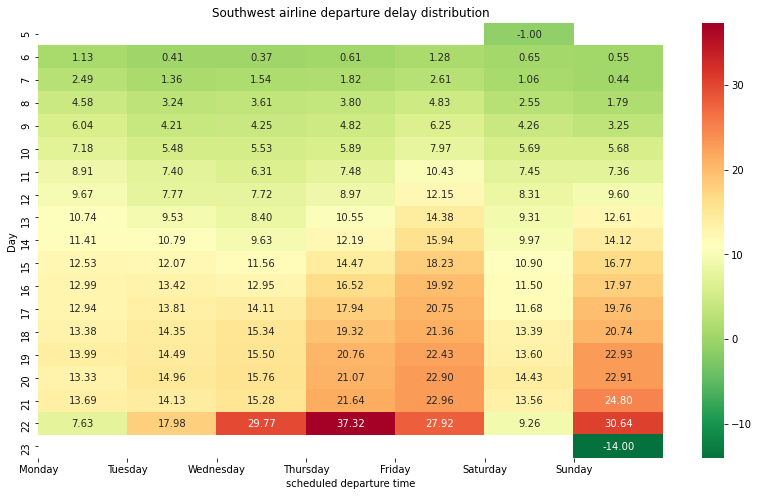

In [42]:
df_max['CRSDepTime_hour']=df_max['CRSDepTime'].apply(lambda x:x//100)
plt.figure(figsize = [14, 8])
sb.heatmap(df_max.groupby(['DayOfWeek','CRSDepTime_hour']).DepDelay.mean().unstack('DayOfWeek'),annot=True,
          fmt='.2F',center=df_max.DepDelay.mean(),cmap='RdYlGn_r')
plt.xticks(XD,values)
plt.ylabel('Day')
plt.xlabel('scheduled departure time')
plt.title('Southwest airline departure delay distribution');

It is clear that on sunday and friday and at the last hour of the day that there is more departure delay time in the busiest air line

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The delay happens more on the days when we shift from work to weekend and vice versa like on Friday and Sunday

### Were there any interesting or surprising interactions between features?

> Even the best companies face some difficulties in organizing trips in some seasons